In [9]:
import pandas as pd
import numpy as np
import requests as r
import requests
from bs4 import BeautifulSoup
import re 
import os
import plotly.graph_objects as go
import sys, getopt
import plotly
import lxml

In [120]:
week = "W2"
directory = f"/Users/joshuasuchon/Desktop/AshburtonDash/"
make_folder = os.path.join(directory, week)
os.mkdir(make_folder)

In [3]:
league_t = 'https://fbref.com/en/comps/9/Premier-League-Stats'
fixture_url = 'https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'

In [4]:
def get_league_table():
    html_content = requests.get('https://fbref.com/en/comps/9/Premier-League-Stats').text.replace('<!--', '').replace('-->', '')
    df = pd.read_html(html_content)
    return df[0]

In [5]:
def get_fixtures(url):
    html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
    df = pd.read_html(html_content)
    return df[0]

In [83]:
#lt = get_league_table(league_t)
fix = get_fixtures(fixture_url)
fix = fix[fix['Score'].notna()]
#lt.to_csv(f"EPL_LT_{week}.csv", index=False)
#fix.to_csv(f"{week}/EPL_Fixtures_{week}.csv")

In [124]:
league_table = get_league_table()

In [126]:
league_table.to_csv(f"{week}/EPL_LT_{week}.csv", index=False)

In [44]:
games = fix.groupby('Wk').size()

In [86]:
int(games.index.max())

6

In [96]:
direct = "/Users/joshuasuchon/Desktop/AshburtonDash/"
#/Users/joshuasuchon/Desktop/AshburtonDash/W6

In [101]:
os.path.isdir(f"{direct}W{int(games.index.max())}") or games[games.index.max()] == 9

True

In [3]:
league = ['rank', 'Squad', 'Matches Played', 'Wins', 'Draws', 'Loses', 'Goals For', 'Goals Against', 'Goal Difference', 'points', 'xG', 'xGA', 'xGD', 'xGD/90']
stats = ["player","nationality","position","squad","age","birth_year","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
stats3 = ["players_used","possession","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"] 
#goalkeeping(keepers)
keepers = ["player","nationality","position","squad","age","birth_year","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
keepers3 = ["players_used","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
#advance goalkeeping(keepersadv)
keepersadv = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
keepersadv2 = ["minutes_90s","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
#shooting(shooting)
shooting = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting2 = ["minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting3 = ["goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
passing = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
passing2 = ["passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
#passtypes(passing_types)
passing_types = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
passing_types2 = ["passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
#goal and shot creation(gca)
gca = ["player","nationality","position","squad","age","birth_year","minutes_90s","sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled", "sca_def","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_def"]
gca2 = ["sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","sca_def","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_def"]
#defensive actions(defense)
defense = ["player","nationality","position","squad","age","birth_year","minutes_90s","tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
defense2 = ["tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
#possession(possession)
possession = ["player","nationality","position","squad","age","birth_year","minutes_90s","touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
possession2 = ["touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
#playingtime(playingtime)
playingtime = ["player","nationality","position","squad","age","birth_year","minutes_90s","games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
playingtime2 = ["games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
#miscallaneous(misc)
misc = ["player","nationality","position","squad","age","birth_year","minutes_90s","cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]
misc2 = ["cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]

In [4]:
#Functions to get the data in a dataframe using BeautifulSoup

def get_tables(url):
    res = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables = soup.findAll("tbody")
    team_table = all_tables[0]
    teams_table = all_tables[1]
    player_table = all_tables[2]
    return player_table, team_table

def get_frame(features, player_table):
    pre_df_player = dict()
    features_wanted_player = features
    rows_player = player_table.find_all('tr')
    for row in rows_player:
        if(row.find('th',{"scope":"row"}) != None):
    
            for f in features_wanted_player:
                cell = row.find("td",{"data-stat": f})
                if cell == None:
                    cell = '0'
                else:
                    a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_player:
                    pre_df_player[f].append(text)
                else:
                    pre_df_player[f] = [text]
    df_player = pd.DataFrame.from_dict(pre_df_player)
    return df_player

def get_frame_team(features, team_table):
    pre_df_squad = dict()
    #Note: features does not contain squad name, it requires special treatment
    features_wanted_squad = features
    rows_squad = team_table.find_all('tr')
    for row in rows_squad:
        if(row.find('th',{"scope":"row"}) != None):
            name = row.find('th',{"data-stat":"squad"}).text.strip().encode().decode("utf-8")
            if 'squad' in pre_df_squad:
                pre_df_squad['squad'].append(name)
            else:
                pre_df_squad['squad'] = [name]
            for f in features_wanted_squad:
                cell = row.find("td",{"data-stat": f})
                if cell == None:
                    cell = '0'
                else:
                    a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_squad:
                    pre_df_squad[f].append(text)
                else:
                    pre_df_squad[f] = [text]
    df_squad = pd.DataFrame.from_dict(pre_df_squad)
    return df_squad

def frame_for_category(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url)
    df_player = get_frame(features, player_table)
    return df_player

def frame_for_category_team(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url)
    df_team = get_frame_team(features, team_table)
    return df_team

In [5]:
#Function to get the player data for outfield player, includes all categories - standard stats, shooting
#passing, passing types, goal and shot creation, defensive actions, possession, and miscallaneous
def get_outfield_data(top, end):
    df1 = frame_for_category('stats',top,end,stats)
    df2 = frame_for_category('shooting',top,end,shooting2)
    df3 = frame_for_category('passing',top,end,passing2)
    df4 = frame_for_category('passing_types',top,end,passing_types2)
    df5 = frame_for_category('gca',top,end,gca2)
    df6 = frame_for_category('defense',top,end,defense2)
    df7 = frame_for_category('possession',top,end,possession2)
    df8 = frame_for_category('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [6]:
#Function to get keeping and advance goalkeeping data
def get_keeper_data(top,end):
    df1 = frame_for_category('keepers',top,end,keepers)
    df2 = frame_for_category('keepersadv',top,end,keepersadv2)
    df = pd.concat([df1, df2], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [7]:
#Function to get team-wise data accross all categories as mentioned above
def get_team_data(top,end):
    df1 = frame_for_category_team('stats',top,end,stats3)
    df2 = frame_for_category_team('keepers',top,end,keepers3)
    df3 = frame_for_category_team('keepersadv',top,end,keepersadv2)
    df4 = frame_for_category_team('shooting',top,end,shooting3)
    df5 = frame_for_category_team('passing',top,end,passing2)
    df6 = frame_for_category_team('passing_types',top,end,passing_types2)
    df7 = frame_for_category_team('gca',top,end,gca2)
    df8 = frame_for_category_team('defense',top,end,defense2)
    df9 = frame_for_category_team('possession',top,end,possession2)
    df10 = frame_for_category_team('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [21]:
#This cell is to get the outfield player data for any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2019/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
df_outfield = get_outfield_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')

#Save csv file to Desktop
# df_outfield.to_csv('PL2021_Outfield.csv',index=False)

df_outfield

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Max Aarons,eng ENG,DF,Norwich City,21-228,2000,1.0,1.0,90.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,7.0,1.0,4.0,20.0
1,Che Adams,sct SCO,FW,Southampton,25-038,1996,1.0,1.0,90.0,0.0,...,3.0,4.0,0.0,0.0,0.0,0.0,8.0,4.0,10.0,28.6
2,Kristoffer Ajer,no NOR,DF,Brentford,23-125,1998,1.0,1.0,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0
3,Nathan Aké,nl NED,DF,Manchester City,26-183,1995,1.0,1.0,90.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0,100.0
4,Trent Alexander-Arnold,eng ENG,DF,Liverpool,22-317,1998,1.0,1.0,90.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Granit Xhaka,ch SUI,MF,Arsenal,28-327,1992,1.0,1.0,90.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,1.0,80.0
276,Andriy Yarmolenko,ua UKR,FW,West Ham,31-301,1989,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
277,Ashley Young,eng ENG,"DF,FW",Aston Villa,36-042,1985,1.0,1.0,90.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,8.0,2.0,0.0,100.0
278,Wilfried Zaha,ci CIV,FW,Crystal Palace,28-283,1992,1.0,1.0,90.0,0.0,...,3.0,6.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0


In [23]:
df_outfield

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Max Aarons,ENG,DF,Norwich City,21,2000,1.0,1.0,90.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,7.0,1.0,4.0,20.0
1,Che Adams,SCO,FW,Southampton,25,1996,1.0,1.0,90.0,0.0,...,3.0,4.0,0.0,0.0,0.0,0.0,8.0,4.0,10.0,28.6
2,Kristoffer Ajer,NOR,DF,Brentford,23,1998,1.0,1.0,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0
3,Nathan Aké,NED,DF,Manchester City,26,1995,1.0,1.0,90.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0,100.0
4,Trent Alexander-Arnold,ENG,DF,Liverpool,22,1998,1.0,1.0,90.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Granit Xhaka,SUI,MF,Arsenal,28,1992,1.0,1.0,90.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,1.0,80.0
276,Andriy Yarmolenko,UKR,FW,West Ham,31,1989,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
277,Ashley Young,ENG,"DF,FW",Aston Villa,36,1985,1.0,1.0,90.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,8.0,2.0,0.0,100.0
278,Wilfried Zaha,CIV,FW,Crystal Palace,28,1992,1.0,1.0,90.0,0.0,...,3.0,6.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0


In [22]:
df_outfield['nationality'] = df_outfield['nationality'].apply(last_3)
df_outfield['age'] = df_outfield['age'].apply(front_2)

In [24]:
df_outfield.to_csv(f"EPL_players_{week}.csv", index=False)

In [20]:
def last_3(x):
    return x[-3:]
def front_2(x):
    return x[:2]

In [40]:
_input = "{element}_df" 

"""for team in df_outfield['squad'].unique():
    #_input.format(element=team) = df_outfield[df_outfield['squad'] == team]
    print(F"{team}_df")"""
    

def teams_create(dataframe):
    empt = []
    for team in dataframe['squad'].unique():
        teams = dataframe[dataframe['squad'] == team].reset_index(drop=True)
        empt.append(pd.DataFrame(teams))
        
    for item in range(len(empt)):
        for name in dataframe['squad']:
            name = empt[item]
        empt.append(name)
        
    return empt

In [8]:
teams_list = df_outfield['squad'].unique()
teamdict = {elem : pd.DataFrame() for elem in teams_list}
for key in teamdict.keys():
    teamdict[key] = df_outfield[:][df_outfield.squad == key]
teams_list

array(['Norwich City', 'Southampton', 'Brentford', 'Manchester City',
       'Liverpool', 'Everton', 'Tottenham', 'Newcastle Utd', 'Chelsea',
       'Brighton', 'Leicester City', 'Crystal Palace', 'West Ham',
       'Leeds United', 'Watford', 'Aston Villa', 'Arsenal', 'Burnley',
       'Wolves', 'Manchester Utd'], dtype=object)

In [9]:
afc = df_outfield[df_outfield['squad'] == 'Arsenal']
avfc = df_outfield[df_outfield['squad'] == 'Aston Villa']
bhafc = df_outfield[df_outfield['squad'] == 'Brighton']
bfc = df_outfield[df_outfield['squad'] == 'Burnley']
brfc = df_outfield[df_outfield['squad'] == 'Brentford']
cfc = df_outfield[df_outfield['squad'] == 'Chelsea']
cpfc = df_outfield[df_outfield['squad'] == 'Crystal Palace']
efc = df_outfield[df_outfield['squad'] == 'Everton']
ffc = df_outfield[df_outfield['squad'] == 'Fulham']
lcfc = df_outfield[df_outfield['squad'] == 'Leicester City']
lfc = df_outfield[df_outfield['squad'] == 'Liverpool']
lufc = df_outfield[df_outfield['squad'] == 'Leeds United']
mcfc = df_outfield[df_outfield['squad'] == 'Manchester City']
mufc = df_outfield[df_outfield['squad'] == 'Manchester Utd']
nufc = df_outfield[df_outfield['squad'] == 'Newcastle']
sfc = df_outfield[df_outfield['squad'] == 'Southampton']
sufc = df_outfield[df_outfield['squad'] == 'Sheffield Utd']
thfc = df_outfield[df_outfield['squad'] == 'Tottenham']
ncfc = df_outfield[df_outfield['squad'] == 'Norwich City']
whufc = df_outfield[df_outfield['squad'] == 'West Ham']
wwfc = df_outfield[df_outfield['squad'] == 'Wolves']
wfc = df_outfield[df_outfield['squad'] == 'Watford']

155
155


In [13]:
afc_colors = ['#DB0007', '#9C824A', '#023474', '#EF0107']
color_scale = ['#539c74' , '#82b180', '#aec691', '#d7dba7', '#fef1c3', '#f5d29b', '#eeb17a', '#e88e62', '#e06955']
sunset = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']

In [14]:
trace1 = go.Bar(x=afc['player'], y=afc['ball_recoveries'], marker_color=afc_colors[0], name='Ball Recoveries')
trace2 = go.Bar(x=afc['player'], y=afc['pressures'], marker_color=afc_colors[1], name='Pressures')
trace3 = go.Bar(x=afc['player'], y=afc['pressure_regains'], marker_color=afc_colors[2], name='Successful Pressures')
afc_logo = base64.b64encode(open('afc_crest.png', 'rb').read())
data = [trace1, trace2, trace3]
layout = go.Layout(title= "<b>Arsenal</b><br>" +
                   "<i>Pressures per player</i>", 
                   barmode='stack', 
                   xaxis_tickangle=-45, 
images=[dict(source='data:image/png;base64,{}'.format(afc_logo.decode()),                     
             xref="paper", yref="paper",
             x=.2, y=1.02,
             sizex=.19, sizey=.18,
             xanchor="right",
             yanchor="bottom",
             opacity=0.4,
             layer="below")])
fig = go.Figure(data, layout)
pyo.plot(fig, filename='afc_pressures.html')

'afc_pressures.html'

In [188]:
data1 = go.Barpolar(dict(r=sakate[419], 
                         theta=sakate['index'],
                         width=sakate[419].mean(),
                         marker_color=[sunset],
                         marker_line_width=2,
                         marker_line_color='black'))
fig1.update_layout(
    template='plotly_dark',
    polar = dict(
        radialaxis = dict(range=[0, 5], showticklabels=False, ticks=''),
        angularaxis = dict(showticklabels=False, ticks='')
    )
)
fig1 = go.Figure(data1)
pyo.plot(fig1)

'temp-plot.html'

In [186]:
sakate = saka90.T.reset_index()
sakate

,index,419
0,goals_per90,0.18
1,assists_per90,0.11
2,goals_assists_per90,0.28
3,goals_pens_per90,0.18
4,goals_assists_pens_per90,0.28
5,xg_per90,0.24
6,xa_per90,0.17
7,xg_xa_per90,0.41
8,npxg_per90,0.24
9,npxg_xa_per90,0.41


In [184]:
saka90cols = [col for col in saka.columns if 'per90' in col]
saka90 = saka.filter(regex='per90')

In [185]:
saka90

,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total_per90,shots_on_target_per90,sca_per90,gca_per90
419,0.18,0.11,0.28,0.18,0.28,0.24,0.17,0.41,0.24,0.41,2.15,0.74,3.45,0.42


In [181]:
per90 = px.line_polar(sakate, 
              r=419, 
              theta='index', line_close=True, 
              title='Bulbasaur Attributes',
              template = 'plotly_dark',
              color=419,
             )
pyo.plot(per90)

'temp-plot.html'

In [59]:
away_teams = fix.Away.tolist()
home_teams = fix.Home.tolist()
squad_lst = list(set(away_teams + home_teams))
chord = fix[['Home', 'Score', 'Away']]
chord

,Home,Score,Away
0,Brentford,2–0,Arsenal
1,Manchester Utd,5–1,Leeds United
2,Leicester City,1–0,Wolves
3,Burnley,1–2,Brighton
4,Watford,3–2,Aston Villa
5,Chelsea,3–0,Crystal Palace
6,Everton,3–1,Southampton
7,Norwich City,0–3,Liverpool
8,Newcastle Utd,2–4,West Ham
9,Tottenham,1–0,Manchester City


In [72]:
chord_data = chord.pivot(index='Away', columns='Home', values='Score')
chord_data

Home,Brentford,Burnley,Chelsea,Everton,Leicester City,Manchester Utd,Newcastle Utd,Norwich City,Tottenham,Watford
Away,,,,,,,,,,
Arsenal,2–0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aston Villa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3–2
Brighton,NaN,1–2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crystal Palace,NaN,NaN,3–0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leeds United,NaN,NaN,NaN,NaN,NaN,5–1,NaN,NaN,NaN,NaN
Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0–3,NaN,NaN
Manchester City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1–0,NaN
Southampton,NaN,NaN,NaN,3–1,NaN,NaN,NaN,NaN,NaN,NaN
West Ham,NaN,NaN,NaN,NaN,NaN,NaN,2–4,NaN,NaN,NaN


In [58]:
chord_data.to_csv(f"chord_{week}.csv")

In [94]:
tops = df_team1.sort_values(by='pressure_regains', ascending=False)[0:5]

In [96]:
tops.to_csv('tops.csv')

In [95]:
tops

,squad,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
8,Leeds United,14.0,51.0,1.0,11.0,90.0,1.0,1.0,0.0,0.0,...,9.0,10.0,3.0,0.0,0.0,0.0,70.0,6.0,11.0,35.3
5,Chelsea,14.0,63.0,1.0,11.0,90.0,3.0,1.0,0.0,0.0,...,15.0,11.0,0.0,0.0,0.0,0.0,51.0,8.0,16.0,33.3
2,Brentford,14.0,35.0,1.0,11.0,90.0,2.0,1.0,0.0,0.0,...,12.0,7.0,1.0,0.0,0.0,0.0,84.0,16.0,25.0,39.0
10,Liverpool,14.0,50.0,1.0,11.0,90.0,3.0,2.0,0.0,0.0,...,14.0,3.0,0.0,0.0,0.0,0.0,83.0,17.0,10.0,63.0
19,Wolves,14.0,44.0,1.0,11.0,90.0,0.0,0.0,0.0,0.0,...,10.0,6.0,4.0,0.0,0.0,0.0,73.0,10.0,11.0,47.6


In [74]:
df_outfield.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games', 'games_starts', 'minutes', 'goals',
       ...
       'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals',
       'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct'],
      dtype='object', length=155)

In [10]:
#This cell is to get the data FOR all teams in any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2019/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
df_team1 = get_team_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')
"""total_teams = int(len(df_team1)/2)
df_team1 = df_team1[total_teams:2*total_teams]
df_team1 = df_team1.reset_index(drop=True)"""

#Save csv file to Desktop
#df_team.to_csv('SerieA2021_teams.csv',index=False)

df_team1

,squad,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Arsenal,14.0,65.0,1.0,11.0,90.0,0.0,0.0,0.0,0.0,...,8.0,12.0,1.0,0.0,0.0,0.0,77.0,25.0,16.0,61.0
1,Aston Villa,14.0,62.0,1.0,11.0,90.0,2.0,1.0,1.0,1.0,...,13.0,18.0,2.0,1.0,0.0,0.0,81.0,16.0,18.0,47.1
2,Brentford,14.0,35.0,1.0,11.0,90.0,2.0,1.0,0.0,0.0,...,12.0,7.0,1.0,0.0,0.0,0.0,84.0,16.0,25.0,39.0
3,Brighton,14.0,64.0,1.0,11.0,90.0,2.0,2.0,0.0,0.0,...,7.0,10.0,0.0,0.0,0.0,0.0,74.0,24.0,29.0,45.3
4,Burnley,14.0,36.0,1.0,11.0,90.0,1.0,1.0,0.0,0.0,...,10.0,7.0,1.0,0.0,0.0,0.0,82.0,29.0,24.0,54.7
5,Chelsea,14.0,63.0,1.0,11.0,90.0,3.0,1.0,0.0,0.0,...,15.0,11.0,0.0,0.0,0.0,0.0,51.0,8.0,16.0,33.3
6,Crystal Palace,14.0,38.0,1.0,11.0,90.0,0.0,0.0,0.0,0.0,...,11.0,14.0,1.0,0.0,0.0,0.0,55.0,16.0,8.0,66.7
7,Everton,14.0,48.0,1.0,11.0,90.0,3.0,3.0,0.0,0.0,...,13.0,14.0,0.0,0.0,0.0,0.0,103.0,21.0,20.0,51.2
8,Leeds United,14.0,51.0,1.0,11.0,90.0,1.0,1.0,0.0,0.0,...,9.0,10.0,3.0,0.0,0.0,0.0,70.0,6.0,11.0,35.3
9,Leicester City,14.0,56.0,1.0,11.0,90.0,1.0,1.0,0.0,0.0,...,6.0,10.0,5.0,0.0,0.0,0.0,68.0,11.0,10.0,52.4


In [28]:
#This cell is to get the data VS all teams in any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2019/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
df_team = get_team_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')
"""total_teams = int(len(df_team)/2)
df_team = df_team[0:total_teams]"""

#Save csv file to Desktop
#df_team.to_csv('SerieA2021_teams_vs.csv',index=False)

df_team

,squad,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Arsenal,14.0,65.0,1.0,11.0,90.0,0.0,0.0,0.0,0.0,...,8.0,12.0,1.0,0.0,0.0,0.0,77.0,25.0,16.0,61.0
1,Aston Villa,14.0,62.0,1.0,11.0,90.0,2.0,1.0,1.0,1.0,...,13.0,18.0,2.0,1.0,0.0,0.0,81.0,16.0,18.0,47.1
2,Brentford,14.0,35.0,1.0,11.0,90.0,2.0,1.0,0.0,0.0,...,12.0,7.0,1.0,0.0,0.0,0.0,84.0,16.0,25.0,39.0
3,Brighton,14.0,64.0,1.0,11.0,90.0,2.0,2.0,0.0,0.0,...,7.0,10.0,0.0,0.0,0.0,0.0,74.0,24.0,29.0,45.3
4,Burnley,14.0,36.0,1.0,11.0,90.0,1.0,1.0,0.0,0.0,...,10.0,7.0,1.0,0.0,0.0,0.0,82.0,29.0,24.0,54.7
5,Chelsea,14.0,63.0,1.0,11.0,90.0,3.0,1.0,0.0,0.0,...,15.0,11.0,0.0,0.0,0.0,0.0,51.0,8.0,16.0,33.3
6,Crystal Palace,14.0,38.0,1.0,11.0,90.0,0.0,0.0,0.0,0.0,...,11.0,14.0,1.0,0.0,0.0,0.0,55.0,16.0,8.0,66.7
7,Everton,14.0,48.0,1.0,11.0,90.0,3.0,3.0,0.0,0.0,...,13.0,14.0,0.0,0.0,0.0,0.0,103.0,21.0,20.0,51.2
8,Leeds United,14.0,51.0,1.0,11.0,90.0,1.0,1.0,0.0,0.0,...,9.0,10.0,3.0,0.0,0.0,0.0,70.0,6.0,11.0,35.3
9,Leicester City,14.0,56.0,1.0,11.0,90.0,1.0,1.0,0.0,0.0,...,6.0,10.0,5.0,0.0,0.0,0.0,68.0,11.0,10.0,52.4


In [13]:
df_team1.to_csv(f"EPL_teams_{week}.csv", index=False)
#df_keeper.to_csv(f"EPL_keepers_{week}.csv", index=False)

In [12]:
week = "W7"
# establish directory variable
directory = "/Users/joshuasuchon/Desktop/Pyprojects/AshburtonDash/"
make_folder = os.path.join(directory, week)
os.mkdir(make_folder)

In [4]:
os.path.join(directory, week)

'/Users/joshuasuchon/Desktop/AshburtonDash/W7'

In [29]:
#This cell is to get the goalkeeper data for any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2019/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
df_keeper = get_keeper_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')

#Save csv file to Desktop
#df_team.to_csv('LaLiga2021_keepers.csv',index=False)

df_keeper

,player,nationality,position,squad,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
0,Alisson,br BRA,GK,Liverpool,28-322,1992,1.0,1.0,90.0,0.0,...,32.6,8.0,50.0,45.8,12.0,0.0,0.0,2.0,2.0,24.3
1,Daniel Bachmann,at AUT,GK,Watford,27-042,1994,1.0,1.0,90.0,2.0,...,41.6,8.0,75.0,55.3,13.0,1.0,7.7,0.0,0.0,11.2
2,Ederson,br BRA,GK,Manchester City,28-003,1993,1.0,1.0,90.0,1.0,...,34.9,6.0,16.7,35.2,3.0,0.0,0.0,2.0,2.0,21.4
3,Łukasz Fabiański,pl POL,GK,West Ham,36-124,1985,1.0,1.0,90.0,2.0,...,46.7,11.0,63.6,49.8,17.0,1.0,5.9,0.0,0.0,9.0
4,David de Gea,es ESP,GK,Manchester Utd,30-286,1990,1.0,1.0,90.0,1.0,...,23.4,12.0,75.0,45.4,10.0,0.0,0.0,0.0,0.0,12.0
5,Vicente Guaita,es ESP,GK,Crystal Palace,34-222,1987,1.0,1.0,90.0,3.0,...,29.7,8.0,25.0,19.8,10.0,2.0,20.0,0.0,0.0,9.0
6,Tim Krul,nl NED,GK,Norwich City,33-139,1988,1.0,1.0,90.0,3.0,...,37.1,8.0,37.5,32.5,11.0,0.0,0.0,1.0,1.0,11.4
7,Bernd Leno,de GER,GK,Arsenal,29-169,1992,1.0,1.0,90.0,2.0,...,28.8,8.0,50.0,36.3,6.0,0.0,0.0,0.0,0.0,5.5
8,Hugo Lloris,fr FRA,GK,Tottenham,34-237,1986,1.0,1.0,90.0,0.0,...,51.9,10.0,80.0,54.7,11.0,0.0,0.0,0.0,0.0,14.5
9,Emiliano Martínez,ar ARG,GK,Aston Villa,28-352,1992,1.0,1.0,90.0,3.0,...,28.8,7.0,42.9,42.9,4.0,0.0,0.0,1.0,1.0,15.7


In [21]:
teams = ['All','Arsenal','Aston Villa','Brentford','Brighton','Burnley','Chelsea','Crystal Palace'
         ,'Everton','Leeds United','Leicester City','Liverpool','Manchester City','Manchester Utd'
         ,'Newcastle Utd','Norwich City','Southampton','Tottenham','Watford','West Ham','Wolves']

In [5]:
get_player_api()

Max Aarons                                         https://resources.premierleague.com/premierleague/photos/players/250x250/p232980.png


In [98]:
# Get a list of all the premier league clubs and the href for their squads
def player_imgs(eplsquad):
    page = requests.get('https://www.premierleague.com/clubs')
    soup = BeautifulSoup(page.text, 'html.parser')
    lsoup = BeautifulSoup(page.text, 'lxml')
    links = soup.find_all(href=re.compile("clubs/\d{1,2}"))
    teams_soup = soup.find_all("h4", class_="clubName")

    x = 0
    team_dict = {}
    for team in teams_soup:
        team_dict.update({team.text: F"https://www.premierleague.com{links[x]['href'].replace('overview', 'squad')}"})
        x += 1
    team_dict['Manchester Utd'] = team_dict.pop('Manchester United')
    team_dict['Brighton'] = team_dict.pop('Brighton and Hove Albion')
    team_dict['Newcastle Utd'] = team_dict.pop('Newcastle United')
    team_dict['Tottenham'] = team_dict.pop('Tottenham Hotspur')
    team_dict['West Ham'] = team_dict.pop('West Ham United')
    #team_dict['Manchester Utd'] = team_dict.pop('Manchester United')

    squadhtml = requests.get(team_dict[eplsquad])
    a_soup = BeautifulSoup(squadhtml.text, 'html.parser')
    b = a_soup.find_all(class_="playerOverviewCard active")
    player = a_soup.find_all(class_='squadPlayerHeader')
    names = [i.find_all(class_="name") for i in player]
    img = [i.find_all('img') for i in player]
    
    player_dict={}
    for num in range(len(player)):
        player_dict.update({names[num][0].text: img[num][0]['data-player']})
        
    if 'Emile Smith Rowe' in player_dict.keys():    
        player_dict['Emile Smith-Rowe'] = player_dict.pop('Emile Smith Rowe')
    
    return player_dict

In [99]:
player_imgs('Arsenal')

{'Bernd Leno': 'p80201',
 'Arthur Okonkwo': 'p220682',
 'Karl Hein': 'p463748',
 'Aaron Ramsdale': 'p225321',
 'Kieran Tierney': 'p192895',
 'Gabriel Magalhães': 'p226597',
 'Rob Holding': 'p156074',
 'Cédric Soares': 'p58822',
 'Calum Chambers': 'p101184',
 'Pablo Marí': 'p92371',
 'Sead Kolasinac': 'p111457',
 'Nuno Tavares': 'p437626',
 'Benjamin White': 'p198869',
 'Takehiro Tomiyasu': 'p223723',
 'Bukayo Saka': 'p223340',
 'Thomas Partey': 'p167199',
 'Mohamed Elneny': 'p153256',
 'Granit Xhaka': 'p84450',
 'Ainsley Maitland-Niles': 'p154043',
 'Albert Sambi Lokonga': 'p437742',
 'Martin Ødegaard': 'p184029',
 'Alexandre Lacazette': 'p59966',
 'Pierre-Emerick Aubameyang': 'p54694',
 'Nicolas Pépé': 'p195735',
 'Eddie Nketiah': 'p205533',
 'Gabriel Martinelli': 'p444145',
 'Folarin Balogun': 'p232223',
 'Emile Smith-Rowe': 'p209289'}

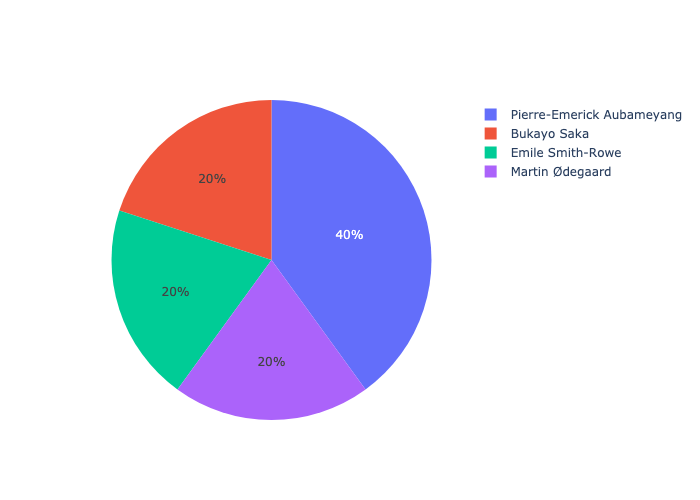

In [131]:
ar = adf[adf['squad']=='Arsenal']
gdf = ar[ar['goals'] > 0]
figpie = go.Figure(data=[go.Pie(labels=gdf.player, values=gdf.goals)])
figpie.show(renderer='png')

In [67]:
ttdf = pd.DataFrame(tdf.mean(axis=1)).reset_index()
ttdf = ttdf[ttdf[0] < 1]

In [34]:
df.rename(columns={'index': 'theta', 330:'r'}, inplace=True)

In [33]:
df = df[['xg_per90', 'xa_per90', 'shots_on_target_per90', 'gca_per90']].T.reset_index()

In [2]:
adf = pd.read_csv("W7/EPL_players_W7.csv")
bdf = adf[adf['player'] == 'Bukayo Saka']
df = bdf.loc[:, (bdf != 0).any(axis=0)]
df = df[['goals_per90', 'assists_per90', 'goals_assists_per90','goals_pens_per90', 'xg_per90',
     'xa_per90', 'xg_xa_per90', 'gca_per90']]
#df = df.filter(like='per90', axis=1).T.reset_index()
df = df.T.reset_index()
df.rename(columns={df.columns[0]: 'stats', df.columns[-1]:'vals'}, inplace=True)
#df = df[df.vals < 1]

In [37]:
tdf = pd.read_csv("W7/EPL_players_W7.csv")
lst = bdf['position'].values[0].split(',')
lst.append(bdf.position.values[0])
tdf = tdf[tdf['position'].isin(lst)]
tdf = tdf.loc[:, (tdf != 0).any(axis=0)]
tdf = tdf[['goals_per90', 'assists_per90', 'goals_assists_per90','goals_pens_per90', 'xg_per90',
     'xa_per90', 'xg_xa_per90', 'gca_per90']]
#tdf = tdf.filter(like='per90', axis=1).T
ttdf = tdf.T
ttdf = pd.DataFrame(ttdf.mean(axis=1)).reset_index()

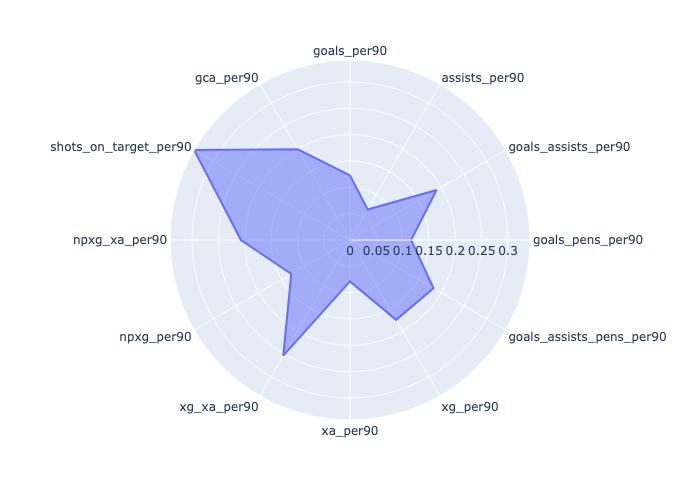

In [84]:
import plotly.express as px
import pandas as pd

fig = px.line_polar(ttdf, r=0, theta='index', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show(renderer='png')

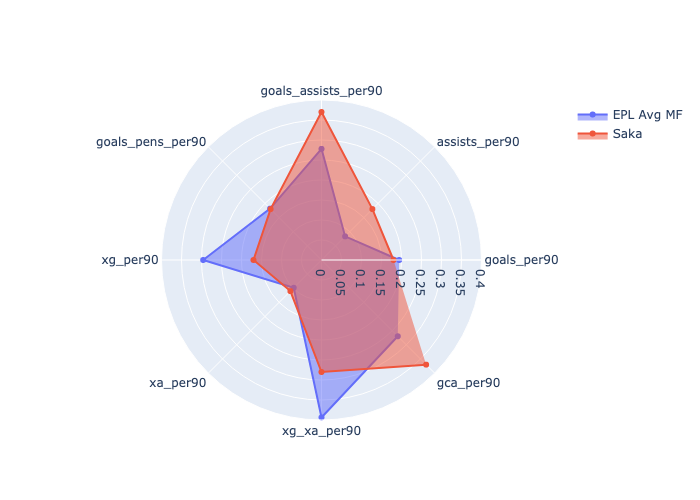

In [39]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=ttdf[0],
      theta=ttdf['index'],
      fill='toself',
      name='EPL Avg MF'
    
))
fig.add_trace(go.Scatterpolar(
      r=df['vals'],
      theta=df['stats'],
      fill='toself',
      name='Saka'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
        range=[0, .4]
    )),
  showlegend=True
)

fig.show(renderer='png')

**Homework:**

- Find stats for each postion for radar chart, limit chart
- overlap current player with EPL average for position
- resize and reorder lower portion of team ui - upper col and lower col
- limit all to within page size
- create further team charts

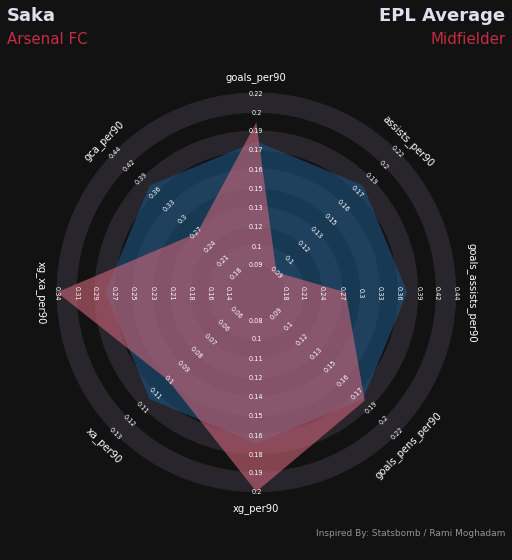

In [20]:
from soccerplots.radar_chart import Radar
title = dict(
    title_name="Saka",
    title_color="#E3DDED",
    subtitle_name="Arsenal FC",
    subtitle_color="#C72C41",
    title_name_2="EPL Average",
    title_color_2="#E3DDED",
    subtitle_name_2='Midfielder',
    subtitle_color_2='#C72C41',
    title_fontsize=18,
    subtitle_fontsize=15
)


## instantiate object 
radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#FFFFFF",
              range_color="#FFFFFF")
              
## plot radar
fig, ax = radar.plot_radar(ranges=ranges, params=df['stats'], values=[df.vals, ttdf[0]],
                        radar_color=['#1c547f', '#CF6679'], 
                           title=title, compare=True)

In [18]:
ranges = []
for v in tdf.columns:
    tup = (bdf[v].min()*.5, bdf[v].max()*1.2)
    ranges.append(tup)

In [19]:
ranges

[(0.09, 0.216),
 (0.09, 0.216),
 (0.185, 0.444),
 (0.09, 0.216),
 (0.085, 0.20400000000000001),
 (0.055, 0.132),
 (0.14, 0.336),
 (0.185, 0.444)]

In [124]:
ttdf

,index,0
0,goals_per90,0.194190
1,assists_per90,0.083476
2,goals_assists_per90,0.277857
3,goals_pens_per90,0.181667
4,xg_per90,0.295810
5,xa_per90,0.098286
6,xg_xa_per90,0.393667
7,gca_per90,0.269667


In [13]:
fix = pd.read_csv("W7/EPL_Fixtures_W7.csv", index_col=0)
play = pd.read_csv("W7/EPL_players_W7.csv")
lt = pd.read_csv("W7/EPL_LT_W7.csv")
gk = pd.read_csv("W7/EPL_keepers_W7.csv")

In [141]:
sorted(lt['Squad'].tolist())

['Arsenal',
 'Aston Villa',
 'Brentford',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leeds United',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester Utd',
 'Newcastle Utd',
 'Norwich City',
 'Southampton',
 'Tottenham',
 'Watford',
 'West Ham',
 'Wolves']

In [93]:
team_a= fix[fix.Home == 'Arsenal']
team_h = fix[fix.Away == 'Arsenal']
fix_df = pd.concat([team_a, team_h])

In [40]:
        def ranges():
            if df['vals'].max() > ttdf[0].max():
                return [df['vals'].min(), df['vals'].max()]
            else:
                return [ttdf[0].min(), ttdf[0].max()]

In [41]:
ranges()

[0.08347619047619047, 0.39366666666666666]

In [9]:
fix_df = fix_df.sort_values(by='Wk').set_index('Wk')

In [10]:
fix_df

,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
Wk,,,,,,,,,,,,,
1.0,Fri,2021-08-13,20:00,Brentford,1.3,2–0,1.5,Arsenal,16479.0,Brentford Community Stadium,Michael Oliver,Match Report,NaN
2.0,Sun,2021-08-22,16:30,Arsenal,0.3,0–2,2.9,Chelsea,58729.0,Emirates Stadium,Paul Tierney,Match Report,NaN
3.0,Sat,2021-08-28,12:30,Manchester City,3.8,5–0,0.1,Arsenal,52276.0,Etihad Stadium,Martin Atkinson,Match Report,NaN
4.0,Sat,2021-09-11,15:00,Arsenal,3.0,1–0,0.6,Norwich City,58000.0,Emirates Stadium,Michael Oliver,Match Report,NaN
5.0,Sat,2021-09-18,15:00,Burnley,1.3,0–1,1.2,Arsenal,20000.0,Turf Moor,Anthony Taylor,Match Report,NaN
6.0,Sun,2021-09-26,16:30,Arsenal,0.8,3–1,1.0,Tottenham,59919.0,Emirates Stadium,Craig Pawson,Match Report,NaN
7.0,Sat,2021-10-02,17:30,Brighton,1.4,0–0,0.5,Arsenal,NaN,The American Express Community Stadium,Jonathan Moss,Match Report,NaN


In [7]:
fix_df.iloc[1].xG


3.0

In [11]:
indexer = fix_df[fix_df['Home']=='Arsenal'].index
a_indexer = fix_df[fix_df['Away']=='Arsenal'].index
xg = pd.DataFrame(pd.concat([fix_df.loc[indexer,'xG'], fix_df.loc[a_indexer, 'xG.1']])).sort_values(by='Wk').reset_index()

In [12]:
op_indexer = fix_df[fix_df['Home']!='Arsenal'].index
op_a_indexer = fix_df[fix_df['Away']!='Arsenal'].index
opxg = pd.DataFrame(pd.concat([fix_df.loc[op_indexer,'xG'], fix_df.loc[op_a_indexer, 'xG.1']])).sort_values(by='Wk').reset_index()

In [14]:
opname = pd.DataFrame(pd.concat([fix_df.loc[op_indexer,'Home'], 
                                 fix_df.loc[op_a_indexer, 'Away']])).sort_values(by='Wk').reset_index()

In [15]:
opname

,Wk,0
0,1.0,Brentford
1,2.0,Chelsea
2,3.0,Manchester City
3,4.0,Norwich City
4,5.0,Burnley
5,6.0,Tottenham
6,7.0,Brighton


In [128]:
team_colors = {'Arsenal': ['#DB0007', '#FFFFFF'],
 'Aston Villa': ['#95BFE5', '#670E36'],
 'Brentford': ['#e30613', '#FFFFFF'],
 'Brighton': ['#0057B8', '#FFCD00'],
 'Burnley': ['#6C1D45', '#99D6EA'],
 'Chelsea': ['#034694', '#EE242C'],
 'Crystal Palace': ['#1B458F', '#A7A5A6'],
 'Everton': ['#003399', '#FFFFFF'],
 'Leeds United': ['#FFCD00', '#1D428A'],
 'Leicester City': ['#003090', '#FDBE11'],
 'Liverpool': ['#C8102E', '#F6EB61'],
 'Manchester City': ['#6CABDD', '#D4A12A'],
 'Manchester Utd': ['#DA291C', '#FBE122'],
 'Newcastle Utd': ['#FFFFFF', '#241F20'],
 'Norwich City': ['#FFF200', '#00A650'],
 'Southampton': ['#D71920', '#FFFFFF'],
 'Tottenham': ['#132257', '#FFFFFF'],
 'Watford': ['#FBEE23', '#ED2127'],
 'West Ham': ['#7A263A', '#1BB1E7'],
 'Wolves': ['#FDB913', '#231F20']}

In [130]:
team_colors['Arsenal'][0]

'#DB0007'

In [16]:
# defender radar columns
defend = ['clearances', 'blocked_passes', 'blocked_shots', 'interceptions', 'tackles_won', 'dribble_tackles_pct']

# GK radar columns
gk = ['saves', 'clean_sheets', 'def_actions_outside_pen_area_gk', 'pct_passes_launched_gk', 'crosses_stopped_gk']

In [ ]:
chart_cols = ['goals', 'assists', 'passes_pct', 'assisted_shots', 'passes_into_final_third', 'gca', 'sca', 'tackles_won', 
              'pressures', 'blocked_shots', 'interceptions', 'dribbles_completed', 'progressive_carries', 
              'carries_into_final_third', 'aerials_won_pct', 'assisted_shots']

In [27]:
stat_dict = {'Goals': 'goals',
 'Assists': 'assists',
 'Passing %': 'passes_pct',
 'Key Passes': 'assisted_shots',
 'Passes into final 3rd': 'passes_into_final_third',
 'Goal-creating Actions': 'gca',
 'Shot-creating Actions': 'sca',
 'Tackles Won': 'tackles_won',
 'Pressures': 'pressures',
 'Blocked Shots': 'blocked_shots',
 'Interceptions': 'interceptions',
 'Dribbles Completed': 'dribbles_completed',
 'Progressive Carries': 'progressive_carries',
 'Carries into final 3rd': 'carries_into_final_third',
 'Ariel Duel Win %': 'aerials_won_pct'}

In [22]:
stat_dict.keys()

dict_keys(['goals', 'assists', 'passes_pct', 'assisted_shots', 'passes_into_final_third', 'gca', 'sca', 'tackles_won', 'pressures', 'blocked_shots', 'interceptions', 'dribbles_completed', 'progressive_carries', 'carries_into_final_third', 'aerials_won_pct'])

In [24]:
stat_dict.values()

dict_values(['Goals', 'Assists', 'Passing %', 'Key Passes', 'Passes into final 3rd', 'Goal-creating Actions', 'Shot-creating Actions', 'Tackles Won', 'Pressures', 'Blocked Shots', 'Interceptions', 'Dribbles Completed', 'Progressive Carries', 'Carries into final 3rd', 'Ariel Duel Win %'])

In [25]:
inv_map = {v: k for k, v in stat_dict.items()}

In [26]:
inv_map

{'Goals': 'goals',
 'Assists': 'assists',
 'Passing %': 'passes_pct',
 'Key Passes': 'assisted_shots',
 'Passes into final 3rd': 'passes_into_final_third',
 'Goal-creating Actions': 'gca',
 'Shot-creating Actions': 'sca',
 'Tackles Won': 'tackles_won',
 'Pressures': 'pressures',
 'Blocked Shots': 'blocked_shots',
 'Interceptions': 'interceptions',
 'Dribbles Completed': 'dribbles_completed',
 'Progressive Carries': 'progressive_carries',
 'Carries into final 3rd': 'carries_into_final_third',
 'Ariel Duel Win %': 'aerials_won_pct'}

In [68]:
    squad = 'Arsenal'
    indexer = fix_df[fix_df['Home'] == squad].index
    a_indexer = fix_df[fix_df['Away'] == squad].index
    xg = pd.DataFrame(pd.concat([fix_df.loc[indexer, 'xG'], fix_df.loc[a_indexer, 'xG.1']])).sort_values(
        by='Wk').reset_index()
    op_indexer = fix_df[fix_df['Home'] != squad].index
    op_a_indexer = fix_df[fix_df['Away'] != squad].index
    opxg = pd.DataFrame(pd.concat([fix_df.loc[op_indexer, 'xG'], fix_df.loc[op_a_indexer, 'xG.1']])).sort_values(
        by='Wk').reset_index()
    opname = pd.DataFrame(pd.concat([fix_df.loc[op_indexer,'Home'], 
                                 fix_df.loc[op_a_indexer, 'Away']])).sort_values(by='Wk').reset_index()
    opxg = opxg.merge(opname, on='Wk').rename(columns={'0_x': 'OPxG', '0_y': 'team'})
    fxg = opxg.merge(xg, on='Wk').rename(columns={0:'squad_xG'})
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(x=opxg['Wk'], y=opxg['OPxG'], 
                              fill='tozeroy', name="Opponent xG",
                              line=dict(dash='dash')))
    fig2.add_trace(go.Scatter(x=opxg['Wk'], y=xg[0], fill='tozeroy', name=f'{squad} xG'))
    fig2.update_traces(mode='markers+lines')
    fig2.update_layout(plot_bgcolor='#0F1117', hovermode="x", title="TRACKING xG BY WEEK", title_x=0.5)
    plotly.offline.plot(fig2)

ValueError: can only convert an array of size 1 to a Python scalar

In [90]:
fix_df[['Home', 'xG', 'xG.1', 'Away']]

,Home,xG,xG.1,Away
Wk,,,,
1.0,Brentford,1.3,1.5,Arsenal
2.0,Arsenal,0.3,2.9,Chelsea
3.0,Manchester City,3.8,0.1,Arsenal
4.0,Arsenal,3.0,0.6,Norwich City
5.0,Burnley,1.3,1.2,Arsenal
6.0,Arsenal,0.8,1.0,Tottenham
7.0,Brighton,1.4,0.5,Arsenal


In [96]:
fix_df[['Wk', 'Home', 'xG', 'xG.1', 'Away']]

,Wk,Home,xG,xG.1,Away
19,2.0,Arsenal,0.3,2.9,Chelsea
35,4.0,Arsenal,3.0,0.6,Norwich City
63,6.0,Arsenal,0.8,1.0,Tottenham
0,1.0,Brentford,1.3,1.5,Arsenal
22,3.0,Manchester City,3.8,0.1,Arsenal
49,5.0,Burnley,1.3,1.2,Arsenal
71,7.0,Brighton,1.4,0.5,Arsenal


In [74]:
fxg = opxg.merge(xg, on='Wk').rename(columns={0:'squad_xG'})

In [87]:
    indexer = fix_df[fix_df['Home'] == squad].index
    a_indexer = fix_df[fix_df['Away'] == squad].index
    xg = pd.DataFrame(pd.concat([fix_df.loc[indexer, 'xG'], fix_df.loc[a_indexer, 'xG.1']])).sort_values(
        by='Wk').reset_index()
    op_indexer = fix_df[fix_df['Home'] != squad].index
    op_a_indexer = fix_df[fix_df['Away'] != squad].index
    opxg = pd.DataFrame(pd.concat([fix_df.loc[op_indexer, 'xG'], fix_df.loc[op_a_indexer, 'xG.1']])).sort_values(
        by='Wk').reset_index()
    opname = pd.DataFrame(pd.concat([fix_df.loc[op_indexer,'Home'], 
                                 fix_df.loc[op_a_indexer, 'Away']])).sort_values(by='Wk').reset_index()
    opxg = opxg.merge(opname, on='Wk').rename(columns={'0_x': 'OPxG', '0_y': 'team'})
    fxg = opxg.merge(xg, on='Wk').rename(columns={0:'squad_xG'})
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(x=fxg['Wk'], y=fxg['OPxG'], 
                              fill='tozeroy', name="Opponent xG",
                              line=dict(dash='dash')))
    fig2.add_trace(go.Scatter(x=fxg['Wk'], y=fxg['squad_xG'], fill='tozeroy', name=f'{squad} xG'))
    fig2.update_traces(mode='markers+lines')
    fig2.update_layout(plot_bgcolor='#0F1117', hovermode="x", title="TRACKING xG BY WEEK", title_x=0.5)
    fig2.update_layout(xaxis = dict(tickvals = fxg['Wk'],ticktext = fxg['team']))
    plotly.offline.plot(fig2)

'temp-plot.html'

In [91]:
def radar(footballer):    
# create radar of selected player against EPL averages
    squad_df = adf[adf['squad'] == 'Arsenal']
    footballer_df = squad_df[squad_df.player == footballer]
    if footballer_df.position.item() in  ['DF', 'DF,MF', 'DF,FW']:
        footballer_df_radar = footballer_df[['clearances', 'blocked_passes', 'blocked_shots', 'interceptions', 
                                         'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd']]
        footballer_df_radar.rename(columns={'clearances': 'Clearances', 'blocked_passes': 'Blocked Passes', 'blocked_shots': 'Blocked Shots', 
                                            'interceptions': 'Interceptions', 'tackles_won': 'Tackles Won', 
                                            'tackles_def_3rd': 'Tackles in Defensive 3rd', 'tackles_mid_3rd': 'Tackles in Middle 3rd', 
                                            'tackles_att_3rd': 'Tackles in Attacking 3rd'}, inplace=True)
        footballer_df_radar = footballer_df_radar.T.reset_index()

    elif footballer_df.position.item() in ['FW', 'MF', 'FW,MF', 'MF,FW', 'MF,DF', 'FW,DF']:
        footballer_df_radar = footballer_df[['goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90',
                                             'xg_per90', 'xa_per90', 'xg_xa_per90', 'gca_per90']]
        footballer_df_radar.rename(columns={'goals_per90': 'Goals per 90', 'assists_per90': 'Assists per 90',
                                            'goals_assists_per90': 'Goals & Assists per 90',
                                            'goals_pens_per90': 'Goals & Pens per 90', 'xg_per90': 'xG per 90',
                                            'xa_per90': 'xA per 90', 'xg_xa_per90': 'xG & xA per 90',
                                            'gca_per90': 'Goal-creating actions per 90'}, inplace=True)
        footballer_df_radar = footballer_df_radar.T.reset_index()

    #footballer_df_radar = pd.DataFrame(footballer_df_radar.mean(axis=1)).reset_index()
    elif footballer_df.position.item() == 'GK':
        gk_df = gk[gk['player'] == footballer]
        gk_df = gk_df[['saves', 'clean_sheets', 'def_actions_outside_pen_area_gk', 'psxg_gk', 'crosses_stopped_gk']]
        gk_df.rename(columns={'saves': 'Saves', 'clean_sheets': 'Clean Sheets', 
                              'def_actions_outside_pen_area_gk': 'Defensive Actions Outside Box', 
                              'psxg_gk': 'Post-Shot xG', 'crosses_stopped_gk': 'Crosses Stopped'})
        footballer_df_radar = gk_df.T.reset_index()

    # other players df
    lst = footballer_df['position'].values[0].split(',')
    lst.append(footballer_df.position.values[0])
    tdf = adf[adf['position'].isin(lst)]
    
    if tdf.position.iloc[0] in ['FW', 'MF', 'FW,MF', 'MF,FW', 'MF,DF', 'FW,DF']:
        tdf = tdf[['goals_per90', 'assists_per90', 'goals_assists_per90','goals_pens_per90',
               'xg_per90','xa_per90', 'xg_xa_per90', 'gca_per90']]
        tdf.rename(columns={'goals_per90': 'Goals per 90', 'assists_per90': 'Assists per 90',
                        'goals_assists_per90': 'Goals & Assists per 90',
                        'goals_pens_per90': 'Goals & Pens per 90',
                        'xg_per90': 'xG per 90', 'xa_per90': 'xA per 90', 'xg_xa_per90': 'xG & xA per 90',
                        'gca_per90': 'Goal-creating actions per 90'}, inplace=True)
        tdf = tdf.T
        
    elif tdf.position.iloc[0] in ['DF', 'DF,MF', 'DF,FW']:
        tdf = adf[['clearances', 'blocked_passes', 'blocked_shots', 'interceptions', 
                    'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd']]
        tdf.rename(columns={'clearances': 'Clearances', 'blocked_passes': 'Blocked Passes', 'blocked_shots': 'Blocked Shots', 
                            'interceptions': 'Interceptions', 'tackles_won': 'Tackles Won', 
                            'tackles_def_3rd': 'Tackles in Defensive 3rd', 'tackles_mid_3rd': 'Tackles in Middle 3rd', 
                            'tackles_att_3rd': 'Tackles in Attacking 3rd'}, inplace=True)
        tdf = tdf.T

    elif tdf.position.iloc[0] =='GK':
        opgk_df = gk[['saves', 'clean_sheets', 'def_actions_outside_pen_area_gk', 
                    'psxg_gk', 'crosses_stopped_gk']]
        opgk_df.rename(columns={'saves': 'Saves', 'clean_sheets': 'Clean Sheets', 
                              'def_actions_outside_pen_area_gk': 'Defensive Actions Outside Box', 
                              'psxg_gk': 'Post-Shot xG', 'crosses_stopped_gk': 'Crosses Stopped'})
        tdf = opgk_df.T
        
    
    footballer_df_radar.rename(columns={footballer_df_radar.columns[0]: 'stats',footballer_df_radar.columns[-1]: 'vals'}, inplace=True)
    tdf = pd.DataFrame(tdf.mean(axis=1)).reset_index()
    tdf.rename(columns={tdf.columns[0]: 'stats',
                        tdf.columns[-1]: 'vals'},inplace=True)


    radar_fig = go.Figure()
    radar_fig.add_trace(go.Scatterpolar(
            r=tdf['vals'],
            theta=tdf['stats'],
            fill='toself',
            name=F'Average EPL {footballer_df.position.item()}',
            hovertemplate="%{theta}<br> %{r:.2f}"))
    radar_fig.add_trace(go.Scatterpolar(
            r=footballer_df_radar['vals'],
            theta=footballer_df_radar['stats'],
            fill='toself',
            name=f'{footballer}',
            hovertemplate="%{theta}<br> %{r:.2f}"))
    radar_fig.update_layout(polar=dict(radialaxis=dict(visible=True, angle=90)), showlegend=True)
    radar_fig.update_polars(dict(radialaxis_autorange=True, bgcolor='#0F1117'))
    radar_fig.update_layout(legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.05))
    return radar_fig

In [93]:
plotly.offline.plot(radar('Kieran Tierney'))

'temp-plot.html'

In [43]:
name = 'Paul Pogba'
footballer_df = play[play.player == name]
lst = footballer_df['position'].values[0].split(',')
lst.append(footballer_df.position.values[0])
tdf = adf[adf['position'].isin(lst)]

In [ ]:
if footballer_df.position.item() in  ['DF', 'DF,MF', 'DF,FW']:
    footballer_df_radar = footballer_df[['clearances', 'blocked_passes', 'blocked_shots', 'interceptions', 
                                         'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd']]
    footballer_df_radar = footballer_df_radar.T.reset_index()
    footballer_df_radar.rename(columns={footballer_df_radar.columns[0]: 'stats',footballer_df_radar.columns[-1]: 'vals'},
                               inplace=True)
elif footballer_df.position.item() in ['FW', 'MF', 'FW,MF', 'MF,FW', 'MF,DF', 'FW,DF']:
    footballer_df_radar = footballer_df[['goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90',
                                             'xg_per90', 'xa_per90', 'xg_xa_per90', 'gca_per90']]
    footballer_df_radar.rename(columns={'goals_per90': 'Goals per 90', 'assists_per90': 'Assists per 90',
                                            'goals_assists_per90': 'Goals & Assists per 90',
                                            'goals_pens_per90': 'Goals & Pens per 90', 'xg_per90': 'xG per 90',
                                            'xa_per90': 'xA per 90', 'xg_xa_per90': 'xG & xA per 90',
                                            'gca_per90': 'Goal-creating actions per 90'}, inplace=True)
    footballer_df_radar = footballer_df_radar.T.reset_index()
    footballer_df_radar.rename(columns={footballer_df_radar.columns[0]: 'stats',footballer_df_radar.columns[-1]: 'vals'},
                               inplace=True)
    #footballer_df_radar = pd.DataFrame(footballer_df_radar.mean(axis=1)).reset_index()
elif footballer_df.position.item() == 'GK':
    gk_df = gk[gk['player'] == name]
    gk_df = gk_df[['saves', 'clean_sheets', 'def_actions_outside_pen_area_per90_gk', 
                                   'goals_against_gk', 'crosses_stopped_gk']]
    footballer_df_radar = gk_df.T.reset_index()
    footballer_df_radar.rename(columns={footballer_df_radar.columns[0]: 'stats',footballer_df_radar.columns[-1]: 'vals'},
                               inplace=True)

In [ ]:
if tdf.position.iloc[0] in ['DF', 'DF,MF', 'DF,FW']:
    tdf = adf[['clearances', 'blocked_passes', 'blocked_shots', 'interceptions', 
                                         'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd']]
    tdf = tdf.T.reset_index()
    tdf.rename(columns={tdf.columns[0]: 'stats',tdf.columns[-1]: 'vals'},
                               inplace=True)
    tdf = tdf.T
    tdf = pd.DataFrame(tdf.mean(axis=1)).reset_index()
elif tdf.position.iloc[0] in ['DF', 'DF,MF', 'DF,FW']:
    tdf = adf[['clearances', 'blocked_passes', 'blocked_shots', 'interceptions', 
                                         'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd']]
    tdf = tdf.T.reset_index()
    tdf.rename(columns={tdf.columns[0]: 'stats',tdf.columns[-1]: 'vals'},
                               inplace=True)
    tdf = tdf.T
    tdf = pd.DataFrame(tdf.mean(axis=1)).reset_index()
elif tdf.position.iloc[0] =='GK':
    gk_df = gk[['saves', 'clean_sheets', 'def_actions_outside_pen_area_per90_gk', 
                    'goals_against_gk', 'crosses_stopped_gk']]
    tdf = gk_df.T.reset_index()
    tdf.rename(columns={tdf.columns[0]: 'stats',
                        tdf.columns[-1]: 'vals'},inplace=True)
    tdf = tdf.T
    tdf = pd.DataFrame(tdf.mean(axis=1)).reset_index()

In [45]:
footballer_df_radar

,stats,vals
0,Goals per 90,0.00
1,Assists per 90,1.20
2,Goals & Assists per 90,1.20
3,Goals & Pens per 90,0.00
4,xG per 90,0.23
5,xA per 90,0.23
6,xG & xA per 90,0.47
7,Goal-creating actions per 90,1.37


In [46]:
lst

['FW', 'MF', 'FW,MF']

In [137]:
gk = pd.read_csv("W7/EPL_keepers_W7.csv")

In [52]:
adf[adf.player == 'Paul Pogba'].position.item()

'FW,MF'

In [132]:
'FW'.split(',')

['FW']